## Book Rating Prediction Using a Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####  IMPORT BOOKS DATA FROM CSV FILE

In [2]:
books_df = pd.read_csv(r"Books.csv",sep=",",index_col="bookID")

### 1.  Feature Engineering 

In [3]:
 # View the books dataset to see is loaded correctly
books_df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9.780200e+12,grc,364,0,0.0,2/22/1922,Oxford University Press USA
2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9.783830e+12,eng,83,1,0.0,9/1/2006,Schirmer Mosel
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9.780440e+12,eng,32,4,1.0,1/1/2002,Teaching Resources
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9.780740e+12,eng,128,2,0.0,3/17/2003,Arcadia Publishing
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9.780740e+12,eng,128,2,0.0,3/6/2003,BradyGames


In [4]:
# Basic statistical analysis on the dataset
# The number of records in the dataset is 11,127
books_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11123.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,542.048099
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780590e+12,299.000000,7.450000e+02,47.000000
75%,4.135000,9.780870e+12,416.000000,4.993500e+03,238.000000
max,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
# Identify the datatypes for the columns
books_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count    float64
publication_date       object
publisher              object
dtype: object

In [6]:
# Check for null values
books_df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  1
isbn13                0
language_code         4
num_pages             0
ratings_count         0
text_reviews_count    4
publication_date      2
publisher             4
dtype: int64

## ISBN stands for International Standard Book Number. It is a unique numeric identifier assigned to each edition and variation of a book.

### ISBN-10: The original ISBN format, consisting of 10 digits. It was used before 2007.
### ISBN-13: The newer ISBN format, consisting of 13 digits. It was introduced in 2007 to increase the capacity of the ISBN system and is now the standard format.

In [7]:
# Drop the columns isbn and isbn13, because it has no impact on the target variable "Average rating"
books_df = books_df.drop(["isbn","isbn13"],axis=1)

#####  Cleaning the column "language_code" 

In [8]:
# select null values for language_code
books_df.loc[books_df.language_code.isna(),:]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,3.58,NaN,236,61,NaN,4/20/2004,NaN
16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,3.58,NaN,400,26,NaN,4/6/2004,NaN
22128,Patriots (The Coming Collapse),James Wesley,3.63,NaN,342,38,NaN,1/15/1999,NaN
34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,0.00,NaN,49,0,NaN,5/1/1977,NaN


In [9]:
# Replace the null values with the language code "eng", I choose "eng" because the "title" of the books are in english and the Authors as well .
books_df.loc[books_df.language_code.isna(),"language_code"] = "eng"

In [10]:
# find distinct values for language_code, and whenever there are different codes with the same meanining we merge to become one.
books_df.language_code.value_counts()

eng      8912
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
rus         2
swe         2
ara         1
glg         1
nor         1
tur         1
msa         1
nl          1
ale         1
gla         1
wel         1
srp         1
Name: language_code, dtype: int64

In [11]:
# Merge the Language codes: en-US, en-GB,en-CA to eng
# select the language_code as series and then convert it into a Set
list_of_lang = set(books_df["language_code"])
list_of_lang

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [12]:
# Create a uniformity in the columm 'language_code' by looping through the list
for i in list_of_lang:
    if i == "English":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "en-US":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"  
    elif i == "en-GB":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "en-CA":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "French":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "fre"

In [13]:
# View the distinct values for language_code after merging identical Language code
books_df.language_code.value_counts()

eng    10541
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
gla        1
tur        1
ale        1
nl         1
msa        1
wel        1
nor        1
ara        1
glg        1
srp        1
Name: language_code, dtype: int64

#####  Cleaning the column "publication_date"

In [14]:
# view null values for publication date
books_df.loc[books_df.publication_date.isna(),:]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295.0,NaN,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2.0,NaN,Folio histoire


In [15]:
# Identify records with the same title but with not null publication date. To replace the null date. 
books_df[books_df['title'].str.contains('Montaillou', na=False)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
45529,Montaillou: The Promised Land of Error,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,416,1142,62.0,7/12/1979,Vintage/Random House (NY)
45530,Montaillou: Cathars and Catholics in a French ...,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,400,80,14.0,12/5/2002,Penguin
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2.0,NaN,Folio histoire
45533,Montaillou: Cathars and Catholics in a French ...,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,400,17,2.0,5/29/1980,Penguin Books Ltd.


In [16]:
# Number of DataFrame rows and columns (including NA elements)
books_df.shape

(11127, 9)

In [17]:
# only one record for the title with null publication date.It can therefore be dropped
# Remove the records that have publication_date null
books_df = books_df.loc[books_df['publication_date'].notna(),:]

In [18]:
# Clean incorrect date value 
books_df.loc[books_df['publication_date']=="1/1/1900 0:00","publication_date"]

Series([], Name: publication_date, dtype: object)

In [19]:
# Convert object/string to date type
books_df.loc[:,"Date"] = pd.to_datetime(books_df['publication_date'])

In [20]:
# Select year from the date
books_df['year'] = books_df['Date'].dt.year


In [21]:
# Select month from the date
books_df['month'] = books_df['Date'].dt.month

In [22]:
# View the dataframe after data cleaning
books_df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Date,year,month
bookID,,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,grc,364,0,0.0,2/22/1922,Oxford University Press USA,1922-02-22,1922,2
2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,eng,83,1,0.0,9/1/2006,Schirmer Mosel,2006-09-01,2006,9
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,eng,32,4,1.0,1/1/2002,Teaching Resources,2002-01-01,2002,1
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,eng,128,2,0.0,3/17/2003,Arcadia Publishing,2003-03-17,2003,3
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,eng,128,2,0.0,3/6/2003,BradyGames,2003-03-06,2003,3


In [23]:
# View the data types
books_df.dtypes

title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count           float64
publication_date              object
publisher                     object
Date                  datetime64[ns]
year                           int64
month                          int64
dtype: object

In [24]:
# Drop the columns "publication_date" and "Date", because it has been transformed to year and month 
books_df = books_df.drop(["publication_date","Date"],axis=1)

#####  Cleaning the column "Authors"

In [25]:
# Create a function to identify "/,C" in the column "Authors"
def Update_strings(name):
    if name.find("/") != -1:
      author_name = name.split("/")[0]
    elif name.find("(") != -1:
      author_name = name.split("(")[0]  
    else:
      author_name = name
    return author_name
   

In [26]:
# Transform the "author" column information to have only one author by picking the first name before the '/' or '('
books_df.loc[:,"authors"] = books_df.loc[:,"authors"].apply(Update_strings)

#####  Cleaning the column "Title"

In [27]:
# Create function to replace special characters such as "!$%^&*" with white space and also '&' with and
def processString(txt):
  specialCharacters = "!$%^&*¡¿" 
  for specialChar in specialCharacters:
    if specialChar == '&':
        txt = txt.replace('&',' and ') 
    else:
        txt = txt.replace(specialChar, ' ')
  return txt

In [28]:
# Update the title column data to bring uniformity to the column "title"
# Replace double white spaces with single white space
books_df.loc[:,"New_title"]= books_df.loc[:,"title"].apply(processString)
books_df['New_title'] = books_df['New_title'].str.replace('  ',' ')

# Create a new title column name: new_title to pick the first name of the title
books_df.loc[:,"New_title"]= books_df.loc[:,"New_title"].apply(Update_strings)

In [29]:
# View the "title" transformation
books_df[["title","New_title"]]

,title,New_title
bookID,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Comoediae 1: Acharenses
2560,Willem de Kooning: Late Paintings,Willem de Kooning: Late Paintings
2843,Literature Circle Guide: Bridge to Terabithia:...,Literature Circle Guide: Bridge to Terabithia:...
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough
14741,Zone of the Enders: The 2nd Runner Official St...,Zone of the Enders: The 2nd Runner Official St...
...,...,...
45259,Anthony Thwaite: In Conversation With Peter Da...,Anthony Thwaite: In Conversation With Peter Da...
12224,Streetcar Suburbs: The Process of Growth in Bo...,Streetcar Suburbs: The Process of Growth in Bo...
16914,The Tolkien Fan's Medieval Reader,The Tolkien Fan's Medieval Reader


In [30]:
# The number of counts for each title
books_df.title.value_counts()

The Iliad                                                                                                                                                           9
The Brothers Karamazov                                                                                                                                              9
Anna Karenina                                                                                                                                                       8
Gulliver's Travels                                                                                                                                                  8
'Salem's Lot                                                                                                                                                        8
                                                                                                                                                                   ..
The 

In [31]:
# Check for null values
books_df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    4
publisher             4
year                  0
month                 0
New_title             0
dtype: int64

##### Clean the column "publisher" 

In [32]:
# View null values of publisher,text_reviews_count 
books_df.loc[books_df.publisher.isna(),:]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,month,New_title
bookID,,,,,,,,,,,
12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,3.58,eng,236,61,NaN,NaN,2004,4,Streetcar Suburbs: The Process of Growth in Bo...
16914,The Tolkien Fan's Medieval Reader,David E. Smith,3.58,eng,400,26,NaN,NaN,2004,4,The Tolkien Fan's Medieval Reader
22128,Patriots (The Coming Collapse),James Wesley,3.63,eng,342,38,NaN,NaN,1999,1,Patriots
34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,0.00,eng,49,0,NaN,NaN,1977,5,Brown's Star Atlas: Showing All The Bright Sta...


In [33]:
# Drop records for null values of "text_reviews_count" and "publisher"
books_df = books_df.loc[books_df['text_reviews_count'].notna(),:]

In [34]:
# Drop the columns publisher from the dataframe
books_df = books_df.drop(["publisher"],axis=1)


In [35]:
# View the data types for the columns
books_df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count    float64
year                    int64
month                   int64
New_title              object
dtype: object

In [36]:
# Replace the "title" column with "new_title" and drop the colum
books_df.loc[:,"title"]= books_df.loc[:,"New_title"].apply(Update_strings)
books_df = books_df.drop(["New_title"],axis=1)
books_df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year,month
bookID,,,,,,,,,
2034,Comoediae 1: Acharenses,Aristophanes,5.0,grc,364,0,0.0,1922,2
2560,Willem de Kooning: Late Paintings,Julie Sylvester,5.0,eng,83,1,0.0,2006,9
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,eng,32,4,1.0,2002,1
4287,Middlesex Borough,Middlesex Borough Heritage Committee,5.0,eng,128,2,0.0,2003,3
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,eng,128,2,0.0,2003,3
...,...,...,...,...,...,...,...,...,...
37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk,0.0,eng,241,0,0.0,2006,8
41044,Day and Night,Better Homes and Gardens,0.0,eng,32,0,1.0,1989,3
42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.0,eng,176,0,0.0,2002,3


#### 2. Exploratory Analysis of the Data

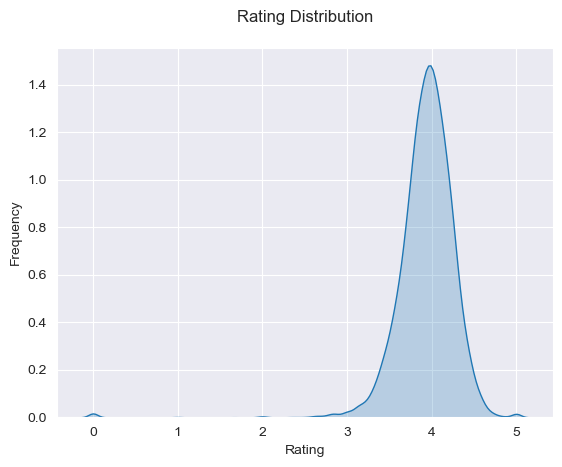

In [37]:
# Ratings distribution
sns.kdeplot(books_df['average_rating'], fill=True) # Replace shade with fill
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show() # This will display the plot


Text(0, 0.5, 'Frequency')

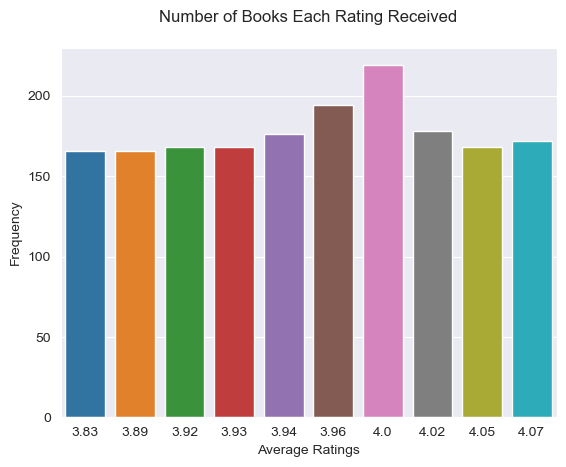

In [38]:
# Top 10 Counts average ratings
sns.barplot(x=books_df['average_rating'].value_counts().head(10).index,y=books_df['average_rating'].value_counts().head(10))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)

### Top 4 Languages

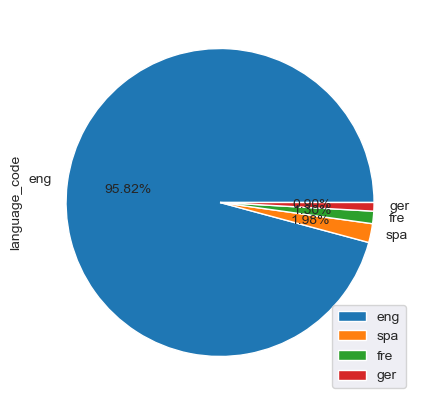

In [39]:
books_df['language_code'].value_counts().head(4).plot(kind = 'pie', autopct='%1.2f%%', figsize=(5, 5)).legend()


In [40]:
# Find mean(average_rating) from dataframe books_df with group by "title" 
title_avg_rat_df = books_df.groupby(["title"])["average_rating"].mean()
# Convert the groupby result into a dataframe
title_df = title_avg_rat_df.to_frame().reset_index()
# Order by title and average_rating
title_df.sort_values(["average_rating","title"],ascending=[False,True]).head(10)

,title,average_rating
960,Bill Gates: Computer Legend,5.0
1201,Bulgakov's the Master and Margarita: The Text ...,5.0
1544,Colossians and Philemon: A Critical and Exeget...,5.0
1560,Comoediae 1: Acharenses,5.0
1875,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.0
2465,Fanning the Flame: Bible Cross and Mission,5.0
3188,His Princess Devotional: A Royal Encounter Wit...,5.0
4100,Literature Circle Guide: Bridge to Terabithia:...,5.0
4509,Middlesex Borough,5.0
5003,Oliver Wendell Holmes in Paris: Medicine Theol...,5.0


<Axes: xlabel='average_rating', ylabel='title'>

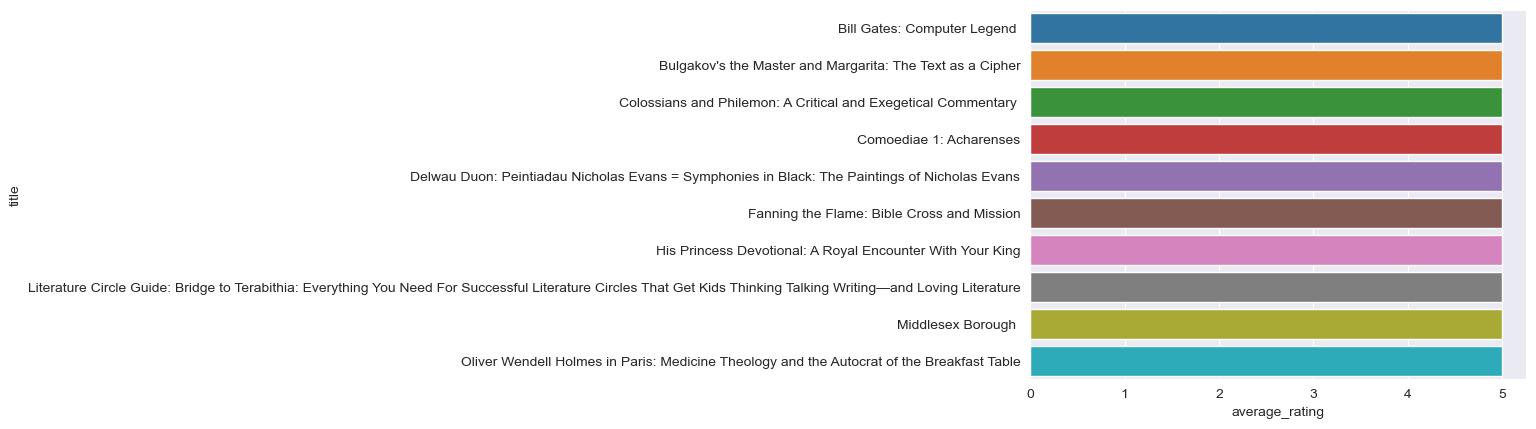

In [41]:
# Sketch the table above in an histogram
title_top_rating = title_df.nlargest(10, ['average_rating']).set_index('title')['average_rating']
sns.barplot(x=title_top_rating, y=title_top_rating.index)

### Top 5 Authors

Text(0.5, 0, 'Total Ratings')

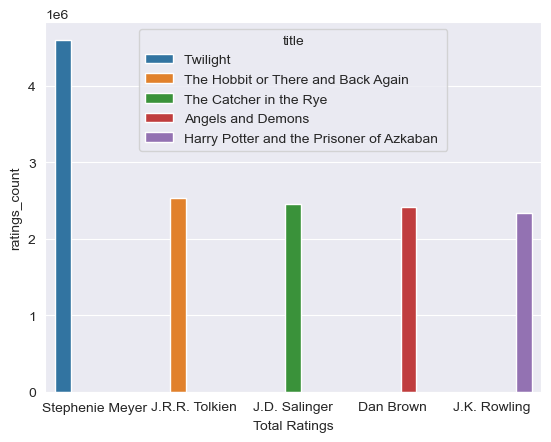

In [42]:
authors = books_df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(y=authors['ratings_count'], x=authors.index, errorbar=None, hue=authors['title']) 
plt.xlabel('Total Ratings')

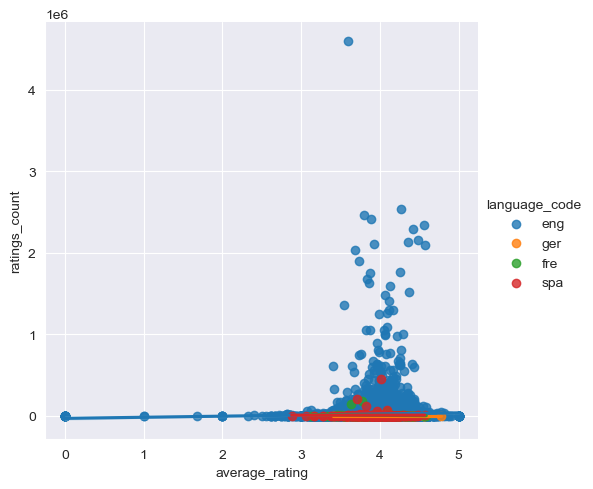

In [43]:
# Visualize the relationship between Average_rating and num_pages with respect to the language code
df_lang=books_df.loc[(books_df['language_code'] == 'eng') | (books_df['language_code'] == 'fre') | (books_df['language_code'] == 'spa') | (books_df['language_code'] == 'ger')]

sns.lmplot(x="average_rating", y="ratings_count",hue = "language_code",data=df_lang);

#### 3. Model Training and Evaluation

##### Transforming categorical data to numeric

In [44]:
# Remove titles that are non ASCII characters
books_df = books_df.loc[~((books_df['title'].str.contains(r'[^\x00-\x7F]')) & ((books_df['language_code'] == 'jpn') | (books_df['language_code'] == 'zho')))]

In [45]:
# Select the top 4 counts for "language_code"
df_processed = books_df.loc[(books_df['language_code'] == 'eng') | (books_df['language_code'] == 'fre') | (books_df['language_code'] == 'spa') | (books_df['language_code'] == 'ger')]

In [46]:
# this is a way to explicit the "language_code" column by transforming it to 4 columns corresponding to each of its values
# this is known as encoding
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.language_code)],axis=1).drop(columns="language_code")

In [47]:
# View the dataframe to be used for machine learning
# It has 10996 records and 12 columns
df_processed

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,year,month,eng,fre,ger,spa
bookID,,,,,,,,,,,,
2560,Willem de Kooning: Late Paintings,Julie Sylvester,5.0,83,1,0.0,2006,9,1,0,0,0
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,32,4,1.0,2002,1,1,0,0,0
4287,Middlesex Borough,Middlesex Borough Heritage Committee,5.0,128,2,0.0,2003,3,1,0,0,0
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,128,2,0.0,2003,3,1,0,0,0
17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,74,5,3.0,2006,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk,0.0,241,0,0.0,2006,8,1,0,0,0
41044,Day and Night,Better Homes and Gardens,0.0,32,0,1.0,1989,3,1,0,0,0
42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.0,176,0,0.0,2002,3,1,0,0,0


In [48]:
# convert 'title' column to numeric
df_processed['title'] = pd.factorize(df_processed['title'])[0]

In [49]:
# convert 'authors' column to numeric
df_processed['authors'] = pd.factorize(df_processed['authors'])[0]

In [50]:
# View the dataframe again now all columns are numeric which is good for the model to be trained.
df_processed

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,year,month,eng,fre,ger,spa
bookID,,,,,,,,,,,,
2560,0,0,5.0,83,1,0.0,2006,9,1,0,0,0
2843,1,1,5.0,32,4,1.0,2002,1,1,0,0,0
4287,2,2,5.0,128,2,0.0,2003,3,1,0,0,0
14741,3,3,5.0,128,2,0.0,2003,3,1,0,0,0
17224,4,4,5.0,74,5,3.0,2006,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37467,10137,4203,0.0,241,0,0.0,2006,8,1,0,0,0
41044,10138,4204,0.0,32,0,1.0,1989,3,1,0,0,0
42758,10139,4205,0.0,176,0,0.0,2002,3,1,0,0,0


In [51]:
# Copy the datafram to csv
df_processed.to_csv('book_processed_cleaned.csv', index=False)
books_df.to_csv('books_df_cleaned.csv', index=False)

#####  Split the data into Train and Test 

In [52]:
# Split the data into train and test for the model
from sklearn.model_selection import train_test_split 

In [53]:
# the size of the test is 20% and the train is 80%
df_train, df_test = train_test_split(df_processed,test_size = 0.2)

In [54]:
# Total records for dataset
len(df_processed)

10996

In [55]:
# Total records for training the model
len(df_train)

8796

In [56]:
# Total records for testing the model
len(df_test)

2200

In [57]:
# Check the data is ramdomly selected
print(df_processed.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9319516187704617
3.9322044110959524
3.930940909090909


In [58]:
# Review the features and the target to be used for the machine learning
df_train.columns

Index(['title', 'authors', 'average_rating', 'num_pages', 'ratings_count',
       'text_reviews_count', 'year', 'month', 'eng', 'fre', 'ger', 'spa'],
      dtype='object')

In [59]:
#get the values of the columns for the training data
X_train = df_train.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_train = df_train.average_rating.values.round(1)

In [60]:
print(X_train)

[[6.668e+03 5.760e+02 4.410e+02 ... 0.000e+00 0.000e+00 1.000e+00]
 [5.707e+03 2.641e+03 2.720e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.620e+02 5.270e+02 7.320e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.281e+03 2.160e+02 1.160e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.211e+03 3.151e+03 7.260e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.461e+03 2.896e+03 5.040e+02 ... 0.000e+00 0.000e+00 0.000e+00]]


In [61]:
print(y_train)

[3.8 3.9 4.3 ... 3.9 3.8 3.5]


In [62]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_test = df_test.average_rating.values.round(1)

In [63]:
# View the values for X_test
print(X_test)

[[2357. 1278.  617. ...    0.    0.    0.]
 [2039. 1130.  116. ...    0.    0.    0.]
 [2874.  441.  224. ...    0.    0.    0.]
 ...
 [8576. 3614.  112. ...    0.    0.    0.]
 [8461. 3576.   96. ...    0.    0.    0.]
 [9717. 2931.  400. ...    0.    0.    0.]]


In [64]:
# View the values y_test
print(y_test)

[4.2 4.2 4.1 ... 3.7 3.7 3.4]


##### Training the Model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
# creating an object of LinearRegression class
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

##### Predict the Target Values

In [67]:
y_test_predicted = lr_model.predict(X_test)

In [68]:
# Approximate to 1 decimal place
y_test_predicted = y_test_predicted.round(1)

In [69]:
# Now compare the actual output values for y_test with the predicted values.
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.2,4.2
2,4.1,4.2
3,3.7,3.6
4,3.6,3.6
5,3.7,3.7
6,3.7,3.6
7,3.7,3.6
8,4.2,4.3
9,4.4,4.4


##### Evalute the Performance of the Model

In [70]:
# Check how accurate is the prediction
(y_test_predicted == y_test).sum()/len(y_test)

0.4731818181818182

In [71]:
# Compute the accuracy of the model
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [72]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted)
meanError = mean_squared_error(y_test,y_test_predicted)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted))

In [73]:
print('R-square is',score)
print('mean_squard_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.7906232858843077
mean_squard_error is 0.021504545454545443
root_mean_squared error is 0.14664428203835786


In [74]:
print('Intercept: \n', lr_model.intercept_)

Intercept: 
 3.0255625773964505


In [75]:
print('Coefficients: \n', lr_model.coef_)

Coefficients: 
 [-9.51449656e-05 -1.78961372e-05  1.80253140e-05 -2.28933713e-08
  1.56500944e-06  7.07460929e-04  2.50425429e-04 -1.21276006e-02
  1.37151107e-04  1.72832856e-02 -5.29283613e-03]


##### Compare the Model with random forest regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [77]:
rf_model = RandomForestRegressor()

In [78]:
rf_model.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [79]:
y_test_predicted_rf = rf_model.predict(X_test)

In [80]:
# Approximate to 1 decimal place
y_test_predicted_rf = y_test_predicted_rf.round(1)

In [81]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_rf.tolist()}).head(25)
preds.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.2,4.2
2,4.1,4.1
3,3.7,3.7
4,3.6,3.6
5,3.7,3.7
6,3.7,3.7
7,3.7,3.7
8,4.2,4.3
9,4.4,4.4


In [82]:
# Check how accurate is the prediction
(y_test_predicted_rf == y_test).sum()/len(y_test)

0.9818181818181818

In [83]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_rf)
meanError = mean_squared_error(y_test,y_test_predicted_rf)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_rf))

In [84]:
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.9907504262840457
mean_sqrd_error is 0.0009500000000000003
root_mean_squared error is 0.03082207001484489


### Support Vector Machine

In [85]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [86]:
y_test_predicted_svr = svr_model.predict(X_test)

In [87]:
# Approximate to 1 decimal place
y_test_predicted_svr = y_test_predicted_svr.round(1)

In [88]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_svr.tolist()}).head(25)
preds.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.2,4.2
2,4.1,4.2
3,3.7,3.6
4,3.6,3.6
5,3.7,3.7
6,3.7,3.6
7,3.7,3.6
8,4.2,4.3
9,4.4,4.4


In [89]:
# Check how accurate is the prediction
(y_test_predicted_svr == y_test).sum()/len(y_test)

0.5036363636363637

In [90]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_svr)
meanError = mean_squared_error(y_test,y_test_predicted_svr)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_svr))

In [91]:
# Print the evaluation metrics
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.7830554528439815
mean_sqrd_error is 0.022281818181818173
root_mean_squared error is 0.14927095558687287


Text(0.5, 1.0, 'Actual vs Predicted')

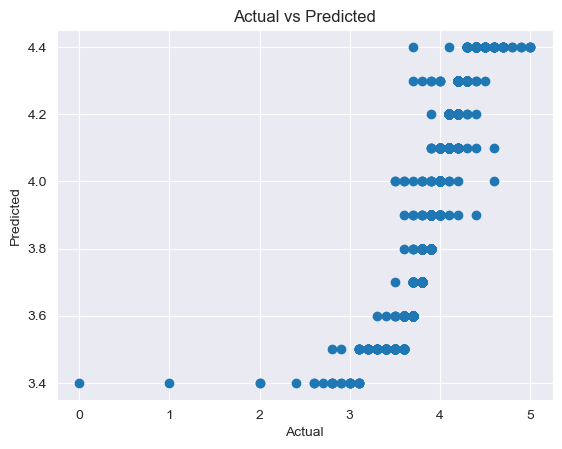

In [92]:
# Print Graph of the actual and predicted values
plt.scatter(y_test,y_test_predicted_svr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [95]:
y_test_predicted_gb = gb_model.predict(X_test)

In [96]:
# Approximate to 1 decimal place
y_test_predicted_gb = y_test_predicted_gb.round(1)

In [98]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_gb.tolist()}).head(25)
preds.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.2,4.2
2,4.1,4.1
3,3.7,3.7
4,3.6,3.6
5,3.7,3.7
6,3.7,3.7
7,3.7,3.7
8,4.2,4.3
9,4.4,4.4


In [99]:
# Check how accurate is the prediction
(y_test_predicted_gb == y_test).sum()/len(y_test)

0.9845454545454545

In [100]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_gb)
meanError = mean_squared_error(y_test,y_test_predicted_gb)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_gb))

In [101]:
# Print the evaluation metrics
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.9929632429625037
mean_sqrd_error is 0.0007227272727272731
root_mean_squared error is 0.026883587422947726


Text(0.5, 1.0, 'Actual vs Predicted')

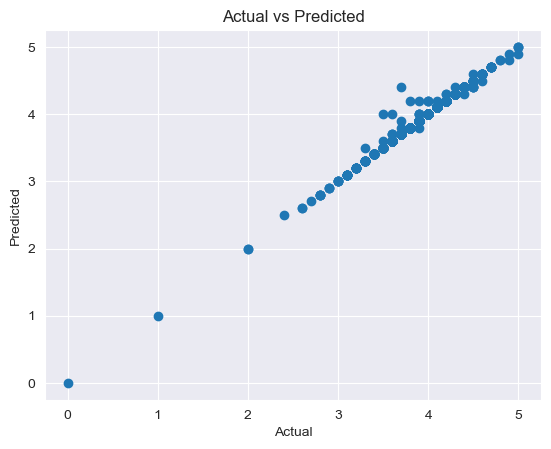

In [102]:
# Print Graph of the actual and predicted values
plt.scatter(y_test,y_test_predicted_gb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Conclusion

The evaluation metrics reveal a substantial difference in performance between the Random Forest Regressor and Linear Regression models. The Random Forest model demonstrates superior predictive accuracy, as evidenced by its significantly higher R-squared value of 0.993, indicating that it explains 99.3% of the variance in the target variable. Conversely, the Linear Regression model's R-squared value of 0.647 suggests that it explains only 64.7% of the variance.

Furthermore, the Random Forest model's lower mean squared error (0.001) and root mean squared error (0.032) underscore its closer alignment with the actual data points compared to the Linear Regression model, which exhibits higher values of 0.048 and 0.220, respectively.